# Veri Ön İşleme

# 1. Veri Ön İşlemeye Genel Bakış

Veri mi Model mi?
* Makine öğrenmesi modelinin amacı: ***genellenebilir*** yapılar ortaya koymaktır. 
>* Belirli olaylar gözlemlendiğinde belirli tahmin sonuçlarını vermektir.

* HBR: Eğer veriniz kötü ise makine öğrenmesi araçlarınız kullanışsız olacaktır.

Veri Ön İşleme Genel Bakış
1.  Veri Temizleme (data cleaning/cleasing)
    1. Gürültülü Veri, örn: erkek Hamilelik durumu
    2. Eksik Veri Analizi
    3. Aykırı Gözlem Analizi
3. Veri Standardizasyonu
    1. 0-1 Dönüşümü
    2. z-skoru Dönüşümü
    3. Logaritmik Dönüşüm
3. Veri İndirgeme
    1. Gözlem Sayısının Azaltması
    2. Değişken Sayısının Azaltılması
4. Değişken Dönüşümleri
    1. Sürekli Değişkenlerde Dönüşümler
    2. Kategorik Değişkenlerde Dönüşümler


# 2. Aykırı Gözlem

1. Aykırı Gözlem: Veride genel eğilimin oldukça dışına çıkan ya da diğer gözlemlerden oldukça farklı olan gözlemlere denir. 
    - Aykırı değeri barından birime aykırı gözlem denir.
2. Aykırı değer: Aykırılığı ifade eden numerik değerdir.
3. Aykırı gözlem olası sonuçları: Genellenebilir kaygısı ile oluşturulan kural setlerini ya da fonksiyonları yanıltır.

# 3. Kime Göre Neye Göre Aykırı

1. Sektör Bilgisi: örn: 1000 odalı ev genel yapıyı bozar.
  
2. Standart Sapma Yaklaşımı: eşik değer= ortalama +-1 x standart sapma(2 ve ya 3 standart sapma eklenebilir.)

3. Z-Skoru yaklaşımı: ortalama +-2.5 değerleri

[4. Boxplot(interquartile range-IQR)yöntemi:](https://www.notion.so/sezginildes/Veri-n-leme-111ee4b07bfd49879a62b4b13be5e014#b58208ddf6f74efb96223c0342c687e1) 

# 4. Aykırı Değerleri Yakalamak

In [1]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna() #boş değerleri silme
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table = df["table"]  #table değişkeni seç
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

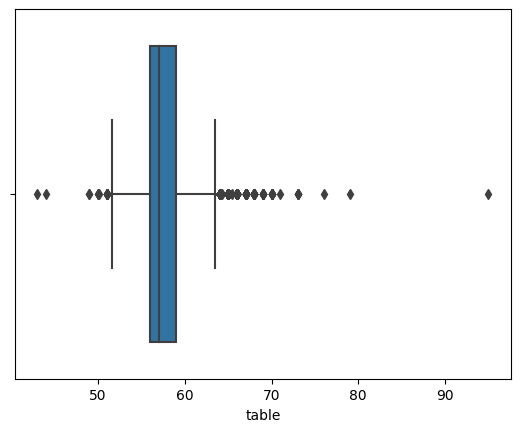

In [3]:
#görselleştirme, aykırı değerler iki siyah çizginin
sns.boxplot(x = df_table); 

In [4]:
# Eşik değer belirleme
Q1 = df_table.quantile(0.25) #ilk çeyreklik
Q3 = df_table.quantile(0.75) #üçüncü çeyrekliği ata.
IQR = Q3-Q1 # veri interquartile, üçüncü çeyrek farkı birinci çeyrek farkı

In [5]:
#ilk çeyreklik
Q1

56.0

In [6]:
#üçüncü çeyrekliği ata.
Q3

59.0

In [7]:
# veri interquartile, üçüncü çeyrek farkı birinci çeyrek farkı
# inter qurtile
IQR # Q3-Q1

3.0

In [8]:
#soldaki uzun siyah çizgi
alt_sinir = Q1- 1.5*IQR 
#sağdaki uzun siyah çizgi
ust_sinir = Q3 + 1.5*IQR
alt_sinir

51.5

In [9]:
ust_sinir

63.5

In [10]:
#aykırı değer sorgulaması

# 1. alt sınırdan düşük değer var mı ?
# 2.  ya da üst sınırdan büyük değer var mı?
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [11]:
#aykırı true false
aykiri_tf = (df_table < alt_sinir)
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [12]:
# fancy index ile yardımıyla aykırı değerleri getir
# 51,5 dan küçük değerler
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [13]:
df_table[aykiri_tf].index
# sonraki işlemlerde,
# 1. silme
# 2. ortalama ile doldurma
# 3. baskılama yönetimi

Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701, 25179,
       26387, 33586, 35633, 45798, 46040, 47630],
      dtype='int64')

# 5. Aykırı Değer Problemini Çözmek

In [14]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

### 5.1 Silme

In [15]:
import pandas as pd
type(df_table) #pandas series

pandas.core.series.Series

In [16]:
# dataframe çevirme
df_table = pd.DataFrame(df_table) #dataframe çevirme
df_table.shape

(53940, 1)

In [17]:
# ~ işareti, sağda taraftaki koşulun dışındakilileri getir.
# aykırılıkları yakalama dşındakiler, axis=1, sütün da işlem yap.

t_df = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)]
t_df.shape

(53335, 1)

Aykırı değerleri hariç tutarak verisetini düzenledik. 53940-53335 = 605 aykırı değer bulunmaktaydı.

### 5.2. Ortalama ile Doldurma

In [18]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()  
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [19]:
df_table = df["table"]
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [20]:
#aykırıları yakalamak, alt sınır
df_table[aykiri_tf] 

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [21]:
#verinin ortalması
df_table.mean()  

57.45718390804598

In [22]:
#aykırılara ortalamaları ver (51,5 dan küçük olan değerlere 57,45 ver)
df_table[aykiri_tf] = df_table.mean()

C:\Users\skumsar\AppData\Local\Temp\ipykernel_12036\3161833637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = df_table.mean()


In [23]:
# aykırı değerleri ortalama ile doldurduk
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

Table sütunundaki tüm aykırı değerleri ortalaması ile doldurduk.


### 5.3. Baskılama Yöntemi
* ayrkırı değeleri sınırlara doğru baskılayarak çekme
* baskılama: yukarı veya aşağı yönlü aşağı çekilmesi. ortalama ile yüksek değerin arasında yüksek bir fark varsa, bunu ortalama ile doldurmak yerine üst sınır yahut alt sınıra çekme


In [24]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [25]:
df_table = df["table"]

In [26]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [27]:
alt_sinir

51.5

In [28]:
#alt sınır değerlerin altındakilerini alt sınırlara atamak (51,5'dan küçük değerlere 51,5 ver)
df_table[aykiri_tf] = alt_sinir

C:\Users\skumsar\AppData\Local\Temp\ipykernel_12036\353590613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = alt_sinir


In [29]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

# 6.Çok Değişkenli Aykırı Gözlem Analizi

### 6.1. Local Outlier Factor LOF

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. 

Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

#### yaş 17, evlilik sayısı 3
En yakın üç komşusuna bak istersen, A nın yoğunluğu diğerlerinde çok daha uzak
[LOF görseli](https://www.notion.so/sezginildes/Veri-n-leme-111ee4b07bfd49879a62b4b13be5e014#a9c968f31cdf4559b6d9d0ff2f65f345)

In [30]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.select_dtypes(include = ['float64', 'int64']) 
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [31]:
#pip install scikit-learn

In [32]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [33]:
# n= neighboors = (komşululuk sayısı, contamination=yoğunluk)
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [34]:
# fit etme, algrotimayı çalıştırma
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [35]:
df_scores = clf.negative_outlier_factor_

In [36]:
# gözlem değerleri için bir yoğunluk skoru, local o.f.
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [37]:
# sıralama yapıyoruz
np.sort(df_scores)
# sıralandıktan sonra ilk yirmi değeri
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [38]:
# eşik değeri belirleme
# 13.değeri eşik skoru olarak belirleyelim
esik_deger = np.sort(df_scores)[13]
esik_deger

-3.823787967755565

In [39]:
# eşik değerlerden yukarıdan olanlara aykiri_tf diyelim
aykiri_tf = df_scores > esik_deger
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

## 6.2 Çok değişkenlilerde silme yöntemi

In [40]:
#aykırı değerleri silme, aykırı değer olmadan yazdırma
yeni_df  = df[df_scores > esik_deger]

In [41]:
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [42]:
#aykırı değerler
df[df_scores < esik_deger]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [43]:
# eşik değeri lof ile bulma
df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


# 7. Baskılama: Çok Değişkenlilerde 

Genellikle tek değişkenlilerde aykırı gözlemlerin işlemleri var.

Eğer aykırı gözlemlerin aykırı olduğundan emin değilsek veya verimizde aykırılıkları da göz önünde bulundurmak istiyorsak baskılama yöntemi iyi bir yöntem olabilir.

In [44]:
# aykırı gözlemlere esik değerleri atamak
baski_deger = df[df_scores == esik_deger]
baski_deger

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [45]:
aykirilar = df[~aykiri_tf]
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [46]:
#index problemini çözmek için
# 1. aykırılar dataframe i indeksiz bir data frame atamak
# 2. baskı gözlemini arraylaştirip baskı gözlemini atamak
# 3. aykırı değerleri baskı değerleri ile değiştirmek

aykirilar.to_records(index = False)
# sadece değerler var, indexlerinden kurtulduk.

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [47]:
res = aykirilar.to_records(index = False)
res

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [48]:
# baskı (esik) değerini alıp arraye çevir
 
res[:] = baski_deger.to_records(index = False)
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [49]:
df[~aykiri_tf]
# oluşturduğumuz arrayı gerçek veri setine nasıl yerleştirebiliriz?

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [50]:
# array data frame çevirmek gerek
import pandas as pd
df[~aykiri_tf] = pd.DataFrame(res, index = df[~aykiri_tf].index)
#### aykırı değerleri indexleri ile çağır.

res değerlerinin indexleri olmadığı için kendimiz aykırı değerlerin indexlerini gireriz.
Bütün aykırı gözlemlerin yerine esik değerimiz olan baskı değerini atamış olduk.

In [51]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


Outlier sorununu çözmek:

**Silme Yaklaşımı:**

t_df = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)]

**Ortalama ile Doldurma:**

df_table[aykiri_tf] = df_table.mean()

**Baskılama Yöntemi:**

df_table[aykiri_tf] = alt_sinir

**Çok Değişkenli Aykırı Gözlem Analizi -Local Outlier Factor(LOF)-
Yoğuluk Temelli Yaklaşım:**

İki değişken tek başınayken aykırı değer olarak görülmüyorken, iki gözlem eş zamanlı olarak değerlendirildiğinde aykırı değerler olabilir.Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor. Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

# 8.Eksik Veri Analizi
İncelenen veri setindeki gözlemlerde eksiklik olma durumu

1. silmek: yeni problem doğurabilir.
> Eksik değere sahip gözlemlerin veri setinden direk çıkarılması ve rassallığın incelenmemesi yapılacak ististiksel çıkarımların, modelleme çalışmaların güvenirliğini düşürecektir. (Reha Alpar,2011)(Çok değişkenli istatistiksel kitabı)
> Tabachnick ve Fidell 1996 Çok değşkenli İstatistisel kitabı. rassal: rastlege: eksik değerler rastgele oluşmamışsa direkt çıkartamamıyoruz.

    1. Veri setindeki eksiklik rastgele mi oluştu yoksa yapısal bir problem mi? Kredi kartı olmayanların kredi kartı harcamasının olmaması. NA başka bir şeyle ilişkili
    
    2. NA her zaman eksiklik anlamına gelmez: örn: kredi kartı var ama kredi kartı harcaması yapmadı bu ay. Yani: ölçüm yapılmamış olabilir. 
    3. Eksik veriyi silmek veya doldurmak veri kaybına yol açabilir. örn: bir değeri eksik ama 99 değeri dolu ise onu silmek onun bilgisini yok eder.

2. doldurmak: yeni problem doğurabilir.

#### Kayıp Türleri

1. Tümüyle Raslantısal kayıp: Diğer değişkenlerden yada yapısal problemlerden kaynaklanmayan

2. Raslantısal Kayıp: Diğer değişkenlere bağlı olarak oluşabilecek eksiklik türü

3. Rastlantısal olmayan Kayıp: Göz ardı edilmeyecek olan ve yapısal problemler ile ortaya çıkan eksiklik türü.

Eksik Veri Rassalığının Testi
1. **Görsel Teknikler**
2. Bağımsız iki örneklem t test
3. Korelasyon Testi
4. **Little'nin MCAR testi**


The idea of imputation is both seductive and dangerous.
R.J.A Little + D.B Rubin

1. Silme Yöntemleri
    1. Gözlem(%70 üzeri) yada değişken silme (%50-60 üzeri)
    2. Liste bazında silme, Listwise Method
    3. Çiftlerin bazından silme, Pairwise method

2. Değer Atama yöntemleri
    1. Ortanca, ortalama, medyan
    2. En benzer birime atama(hot deck
    3. Dış kaynaklı atama

3. Tahmine dayalı Yöntemler
    1. Makine Öğrenmesi
    2. EM
    3. Çoklu Atama Yöntemi

# 9.Hızlı Çözüm: Eksik Veride

In [52]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [53]:
# eksik verilerin sayılarının toplamı
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [54]:
#boş olmayan değerleri
# eksik veri olmayan sayıların toplamı, tam olan sayıların toplamı
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [55]:
#bütün veri setindeki toplam eksik sayılar
df.isnull().sum().sum()

7

In [56]:
#eksik değerleri barındıran gözlem birimleri
#eksiklik var mı yok mu?
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [57]:
# any= en az bir tane eksik değer varsa getir
# eksik değerleri bulundurur gözlemleri getiriyor.
df[df.isnull().any(axis = 1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [58]:
#hepsi dolu olan gözlem birimlerini sütünlara göre getir
df[df.notnull().all(axis = 1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [59]:
# v1 ve v2 ve v3 boş olmayan değerleri getir.
df[df["V1"].notnull() & df["V2"].notnull()& df["V3"].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### 9.2 eksik degerlerin direkt silinmesi

In [60]:
# bir gözlem biriminde bir eksiklik varsa gözlem birimi uçuruyor
df.dropna()
# geçici bir uçurma yöntemi olmaması için inplace kullanmak gerekir

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [61]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [62]:
#kalıcı silmeyi sağlama
df.dropna(inplace =True) 
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### 9.3 Basit deger atama

In [63]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [64]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [65]:
df["V1"]
#eksik değerleri görme

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: V1, dtype: float64

In [66]:
df["V1"].mean()
#v1 ortalaması

6.0

In [67]:
#v1  değerleri v1 ortalamalarıyla ata
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [68]:
# Nan değerlerini 0 ile doldurmak
df["V2"].fillna(0)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

In [69]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [70]:
# onlarca değişken olursa nasıl yapacağız?
# apply sütünlar üzerine bir işlem yapacak.
# axis = 0 satırlara göre
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


### 9.4 Eksik Değerlerin Saptanması

In [71]:
#değişkenlerdeki tam değer sayısı
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [72]:
#değişkenlerdeki eksik değer sayısı
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [73]:
#veri setindeki toplam eksik değer sayısı
df.isnull().sum().sum()

7

In [74]:
#en az bir eksik değere sahip gözlemler
df[df.isnull().any(axis=1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [75]:
#tüm değerleri tam olan gözlemler
df[df.notnull().all(axis=1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


# 10.Eksik Veri Yapısının Görselleştirilmesi

In [76]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [77]:
# Missing No kütüphanesi
#!pip install missingno

In [78]:
import missingno as msno

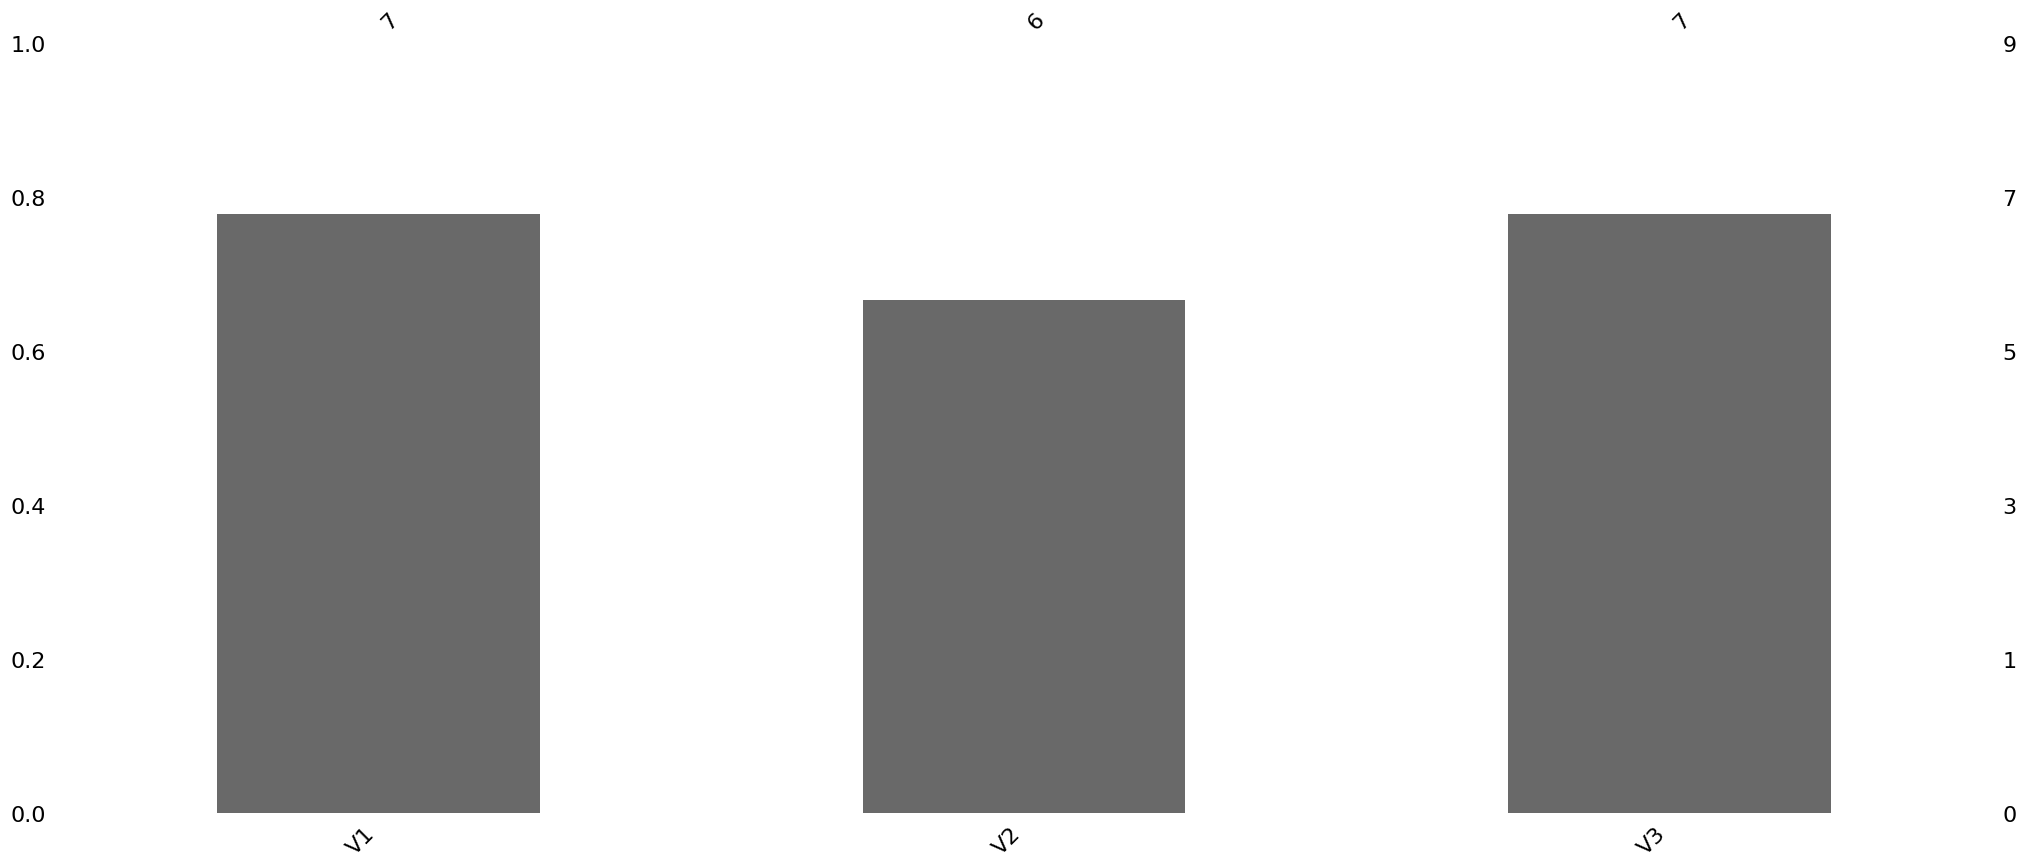

In [79]:
msno.bar(df);

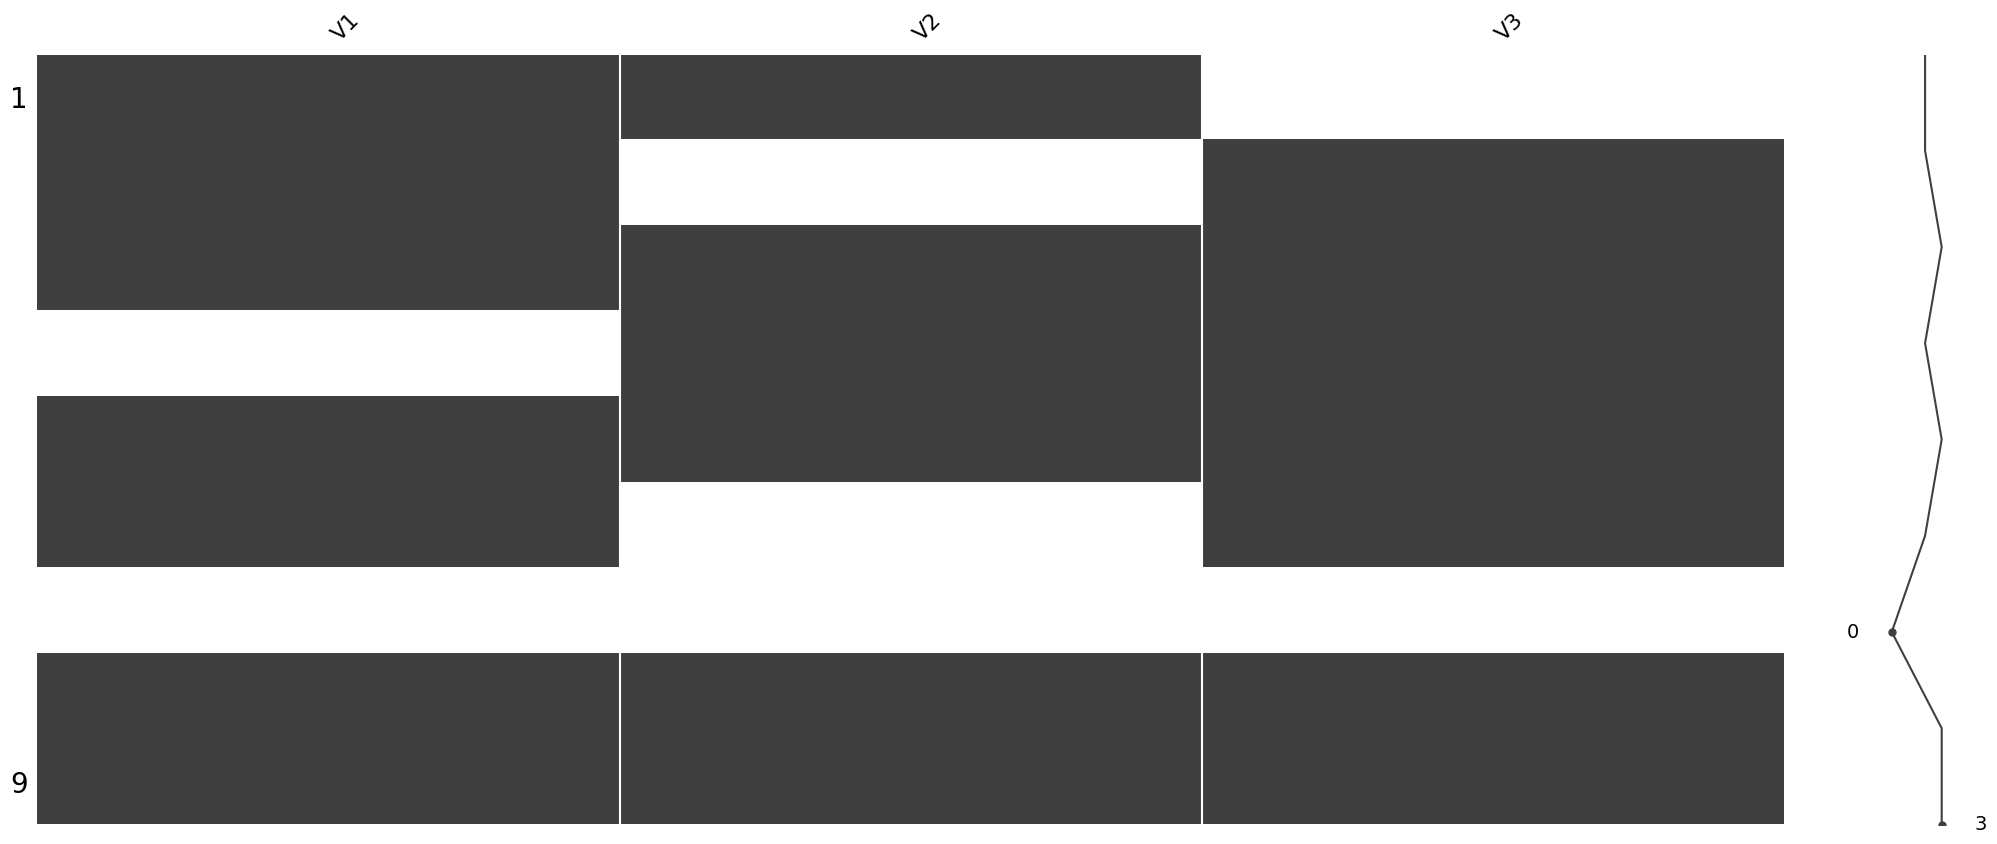

In [80]:
msno.matrix(df);
# eksik değerlerin rastsallığı yapısal bozukluğunu görme
# göz ile yakalanamayan eksiklikleri binlerce verideki gözlemi görmeyi sağlar
# toplam 9 gözlem var

Örneğin 8.satırda tüm değerlerin dolu olduğu gözükmektedir.

In [81]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [82]:
import seaborn as sns
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [83]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

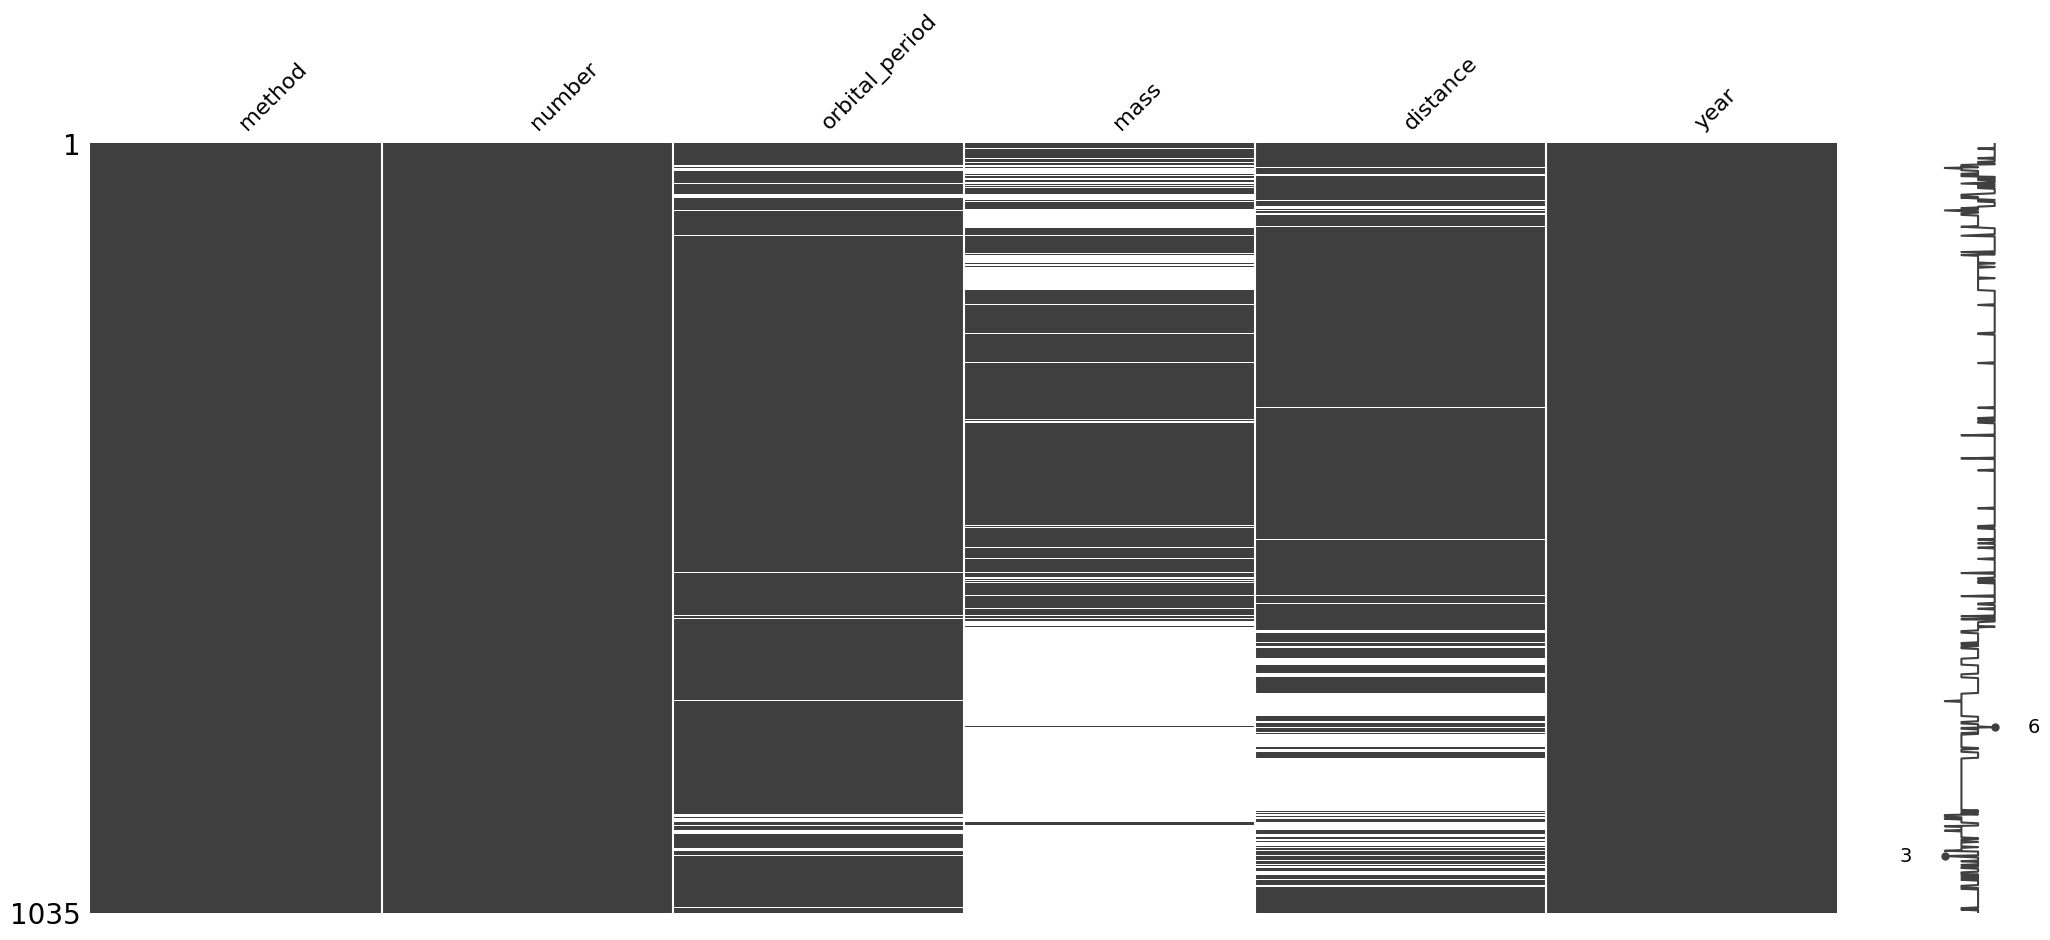

In [84]:
msno.matrix(df);
#değişkenler arasında bir bağımlılık var mı yok mu görmeyi sağlama?

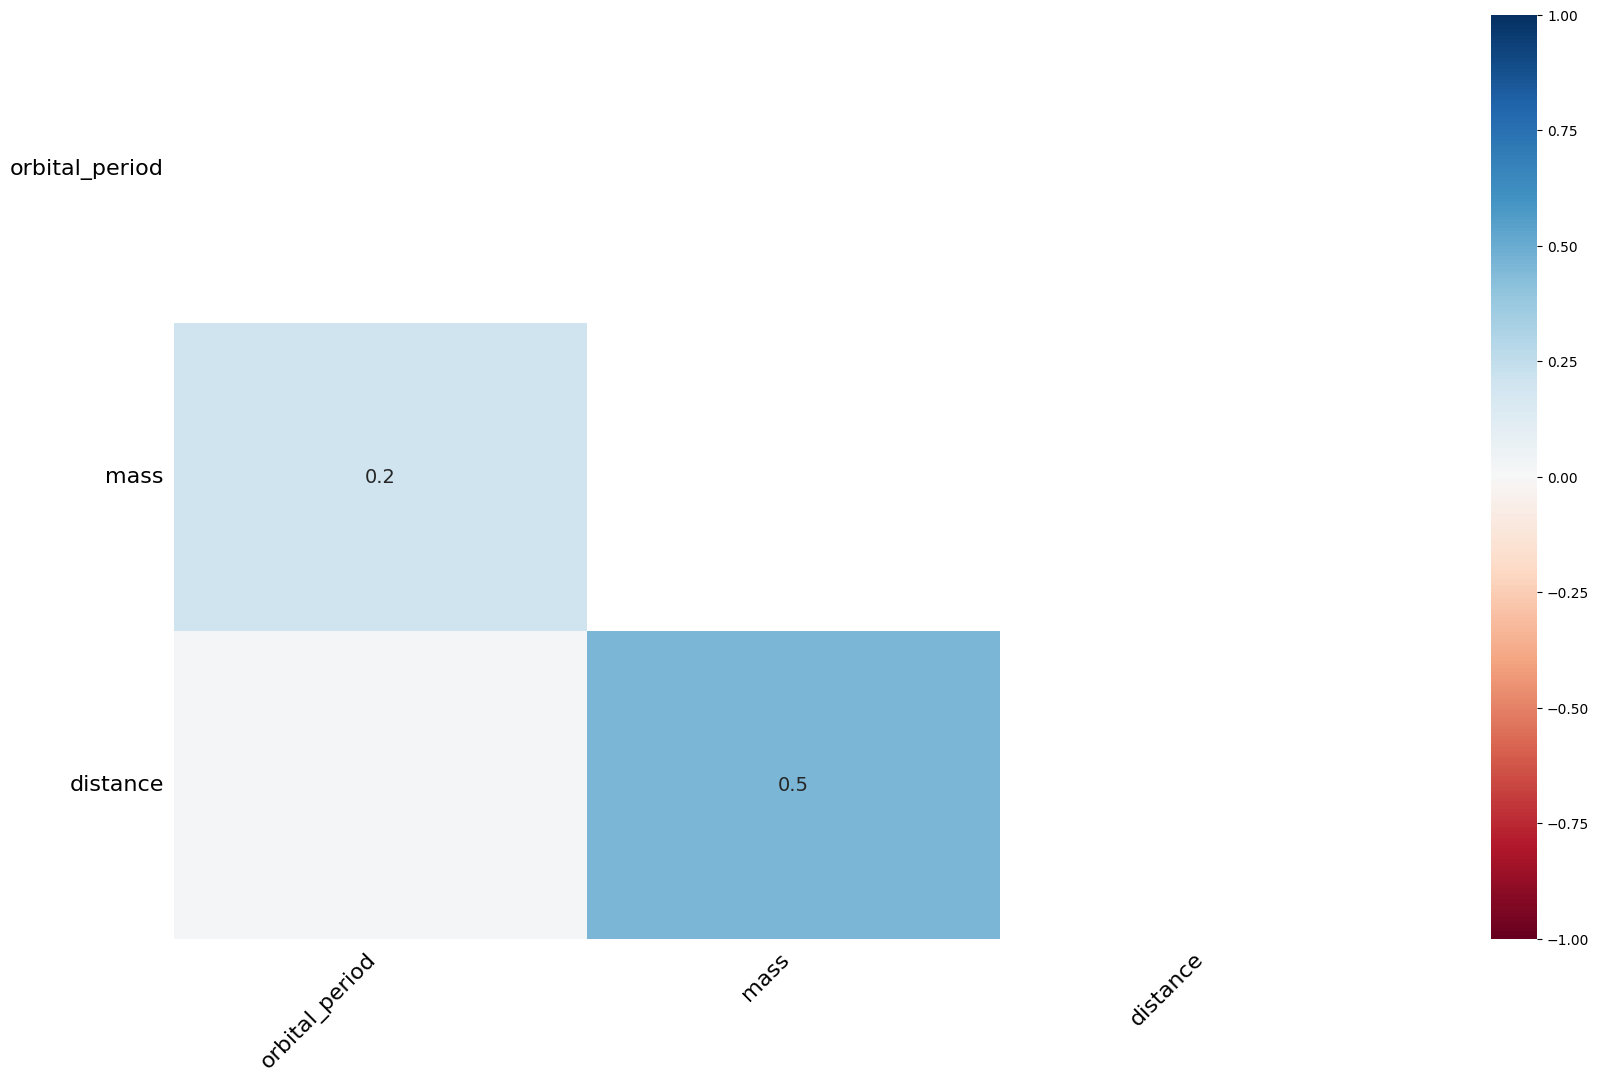

In [85]:
# Boşluklar arasında bir ilişki var mı?
# eksikliği 
# nullity correlation boşluk arasında bir bağ var mı?
msno.heatmap(df);
# orta şiddetli bir korelasyon var.
# değişkenlerin birbirine olan bağımlılığına dikkattt
# orbital_period ve mass değişkenleri arasında bir bağlılık vardır.
# mass ve distance arasında eksik değerlerden kaynaklı bağımlılığını tam olarak göremesek de
# heatmap çizdirdiğimiz de orta şiddetli bağlılık durumu (0.5) gözlenir.

# 11. Silme Yöntemleri: Eksik Veride

In [86]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [87]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [88]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [89]:
# bütün değerleri boş olanı sil.
# aynı anda hepsi boş olanı sil
df.dropna(how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


6.index silinmiştir.

In [90]:
# en az bir tane eksikliği olan gözlemi uçur
# değişkenler bazında silme gerçekleştir. hepsi gider. sütun olarak
df.dropna(axis = 1)

""
0
1
2
3
4
5
6
7
8


In [91]:
# tüm değerleri nan olan sütunu sil.
# değişkenlere göre işlem yap.
df.dropna(axis = 1, how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [92]:
# tüm değerleri nan olan atama yaparak boş sütun oluştur
df["sil_beni"] = np.nan

In [93]:
df

,V1,V2,V3,sil_beni
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [94]:
# tüm değerleri nan olan değerleri geçici silme
df.dropna(axis = 1, how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [95]:
df

,V1,V2,V3,sil_beni
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [96]:
# Kalıcı silme,
df.dropna(axis = 1, how = "all", inplace = True)

In [97]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


# 12.Basit Değer Atama Yöntemleri: Eksik Veride

In [98]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### 12.1 sayısal degiskenlerde atama 

In [99]:
df["V1"].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [100]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [101]:
#ortalama ile doldurma
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

#### birinci yol

In [102]:
# tüm değiskenler için birinci yol
# tüm değişkenleri ortalama ile doldurma, x sütünları
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


#### ikinci yol

 Eğer dağılımlar çarpıksa, bazılarına ortalama bazılarına medyan değerleri atamak gerekiyor.

In [103]:
# bütün değişkenlere ortalama ile doldurma
df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [104]:
# v1 den v2 e kadar, bunlar simetrik, dağılımlılar simetrik
# eğer dağılımlar asimetriks;, sağa çarpık, sola çarpık ise medyan değerleri
df.fillna(df.mean()["V1":"V2"])

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [105]:
# medyan değerini atamak.
df["V3"].fillna(df["V3"].median())

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

#### Üçüncü yol,


In [106]:
# pandas içinde notna 
# eksik değerlerin yerine o değişkenlerin ortalamasını atıyor.
df.where(pd.notna(df), df.mean(), axis = "columns")

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


# 13.Kategorik Değişken Kırılımında Değer Atama: Eksik veride

In [107]:
# uzmanlıklarına göre  maaş atması,
# 5 yıl uzmanlığı olan kişilerin ayrı bir seviyede.
# 3 yıl uzmanlığı olan kişileri
# departmanlerı kendi içinde maaş 
# okul seviyelerine göre maaş ataması
# 
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df


,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [108]:
# departmanların maaş ortalamaları nedir?
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [109]:
df["maas"]

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: maas, dtype: float64

In [110]:
# maas verisindeki eksikleri doldurmak istiyoruz.
# departmana göre gruplayalım.
# transform ile ortalamaları dönüştür.
# Eksik olan değerlerin ikiside İK departmanında olduğu için
# ik bölümüne göre dolduruldu.
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

# 14. Kategorik Değişkenler için Değer Atama

In [111]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}        
)

df
# nan veri var

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [112]:
# kategorik değerlerde eksik veriler moda göre yapılır. 
# en çok tekrar eden neyse ona göre doldurulur.
df["departman"].mode()[0]

'IK'

In [113]:
df["departman"].mode()

0    IK
Name: departman, dtype: object

In [114]:
# departman değişkenin modu ile doldur.
df["departman"].fillna(df["departman"].mode()[0])
#kalıcı bir değişiklik değil.

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [115]:
df
#kalıcı değişiklik yapma inplace= True ile doldurlur.

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [116]:
#sonraki değişikliği dolduruyor, 
# before fill
df["departman"].fillna(method = "bfill")

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [117]:
# önceki değer ile doldurma
df["departman"].fillna(method = "ffill")

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

# 15. Tahmine Dayalı Değer Atama Yöntemleri

1. KKN: K en Yakın Komşu 
2. Random Forest:
3. EM: Expectation Maximizatio (EM) Algorithm

In [118]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum() # eksik değerleri ifade ediyor

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

### 15.1 KNN: K-Nearest Neighbors Algorithm

In [119]:
#!pip install ycimpute

In [120]:
df

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [121]:
df.shape

(891, 6)

In [122]:
# k near neigboorhood input
from ycimpute.imputer import knnimput

In [123]:
# dataframeleri isimlerini tutma
var_names = list(df)

In [124]:
var_names

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [125]:
#data framei numpy e çevirme
import numpy as np
n_df = np.array(df)

In [126]:
n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [127]:
n_df.shape # head() pandas a ait.

(891, 6)

In [128]:
# k = komşuluk sayısı, k en yakın komşu algoritması
# k parametresi, 
dff = knnimput.KNN(k = 4).complete(n_df)
# complete ile numpy array listesini kullanarak knn e göre doldur

Imputing row 1/891 with 0 missing, elapsed time: 0.136
Imputing row 101/891 with 0 missing, elapsed time: 0.137
Imputing row 201/891 with 0 missing, elapsed time: 0.137
Imputing row 301/891 with 1 missing, elapsed time: 0.138
Imputing row 401/891 with 0 missing, elapsed time: 0.139
Imputing row 501/891 with 0 missing, elapsed time: 0.139
Imputing row 601/891 with 0 missing, elapsed time: 0.140
Imputing row 701/891 with 0 missing, elapsed time: 0.140
Imputing row 801/891 with 0 missing, elapsed time: 0.141


In [129]:
# numpy array, 
type(dff)

numpy.ndarray

In [130]:
# pandas dataframe çevirmek gerekiyor.
import pandas as pd
dff = pd.DataFrame(dff, columns = var_names)

In [131]:
dff

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,1.0,1.0,38.000000,1.0,0.0,71.2833
2,1.0,3.0,26.000000,0.0,0.0,7.9250
3,1.0,1.0,35.000000,1.0,0.0,53.1000
4,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,0.0,2.0,27.000000,0.0,0.0,13.0000
887,1.0,1.0,19.000000,0.0,0.0,30.0000
888,0.0,3.0,26.026414,1.0,2.0,23.4500
889,1.0,1.0,26.000000,0.0,0.0,30.0000


In [132]:
type(dff)

pandas.core.frame.DataFrame

In [133]:
# toplam eksik değerlei kaç tane oldu?
dff.isnull().sum() 

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

### 15.2 random forests

In [134]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [135]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

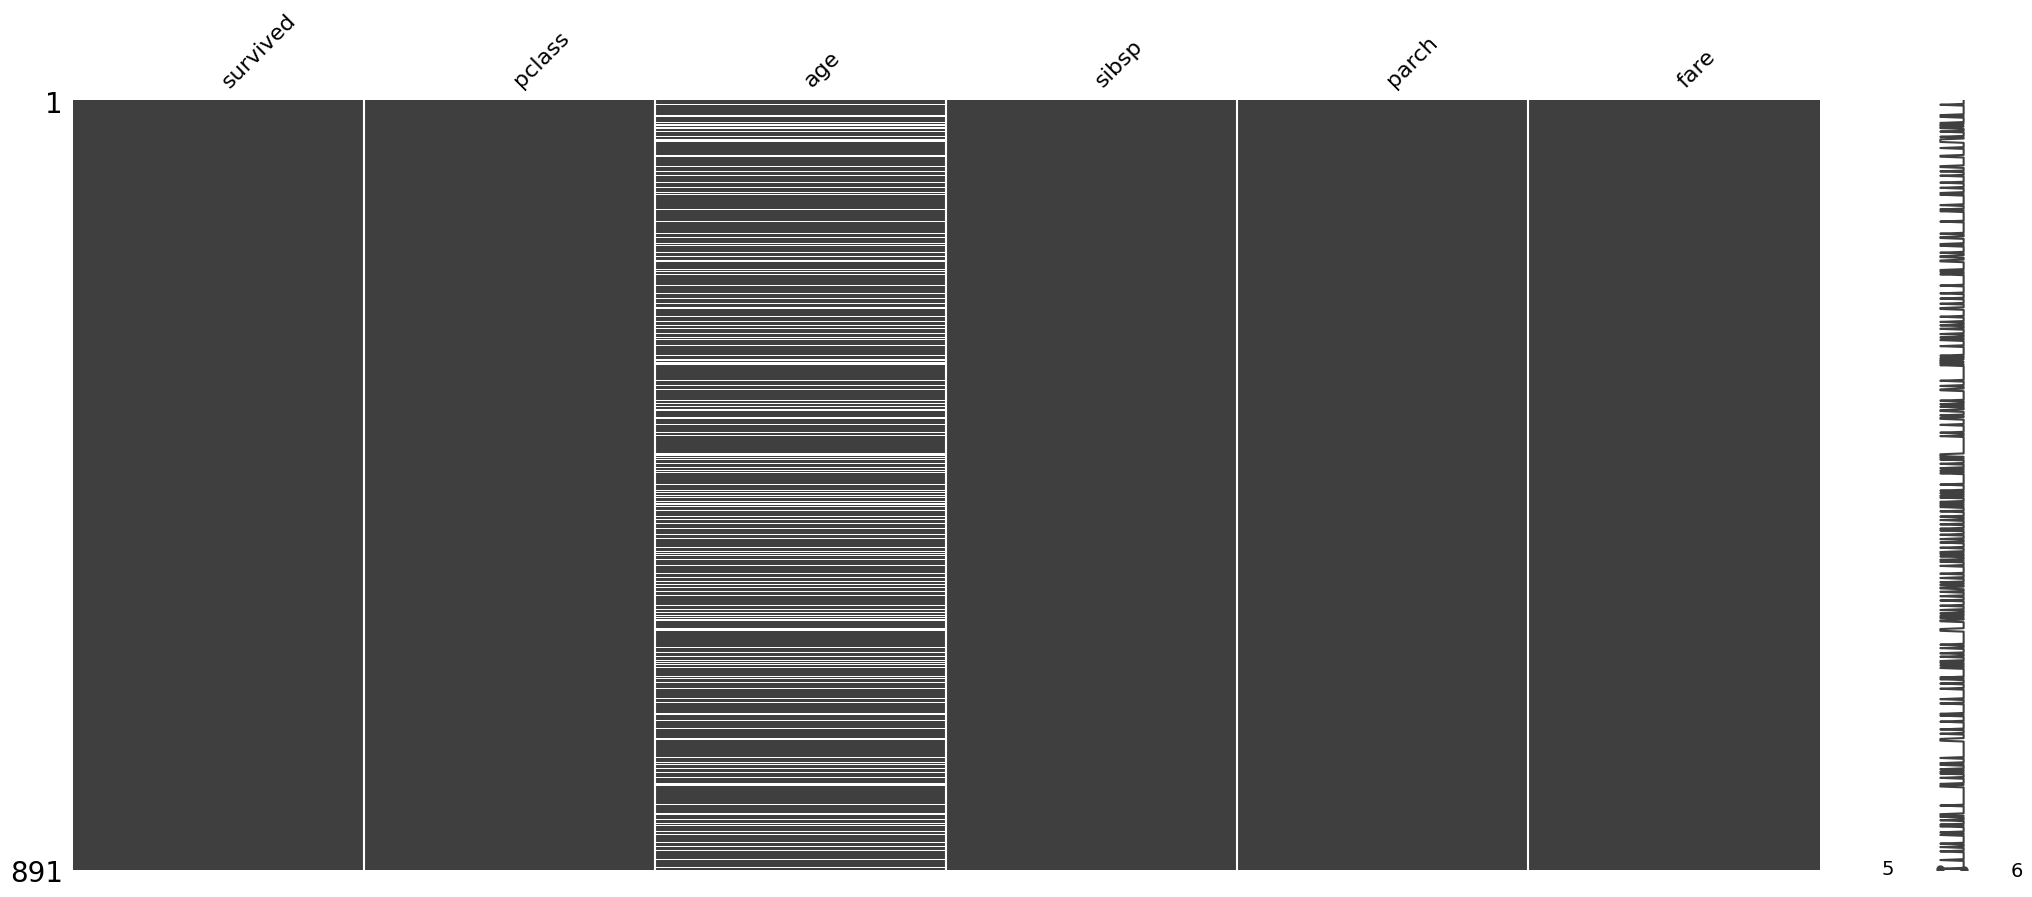

In [136]:
msno.matrix(df);

In [137]:
var_names = list(df)

In [138]:
import numpy as np
n_df = np.array(df)

In [139]:
from ycimpute.imputer import iterforest
dff = iterforest.IterImput().complete(n_df)
# özellik uyarısı veriyor. Hata değil.

AttributeError: module 'ycimpute.imputer.iterforest' has no attribute 'IterImput'

In [140]:
dff = pd.DataFrame(dff, columns = var_names)

In [141]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

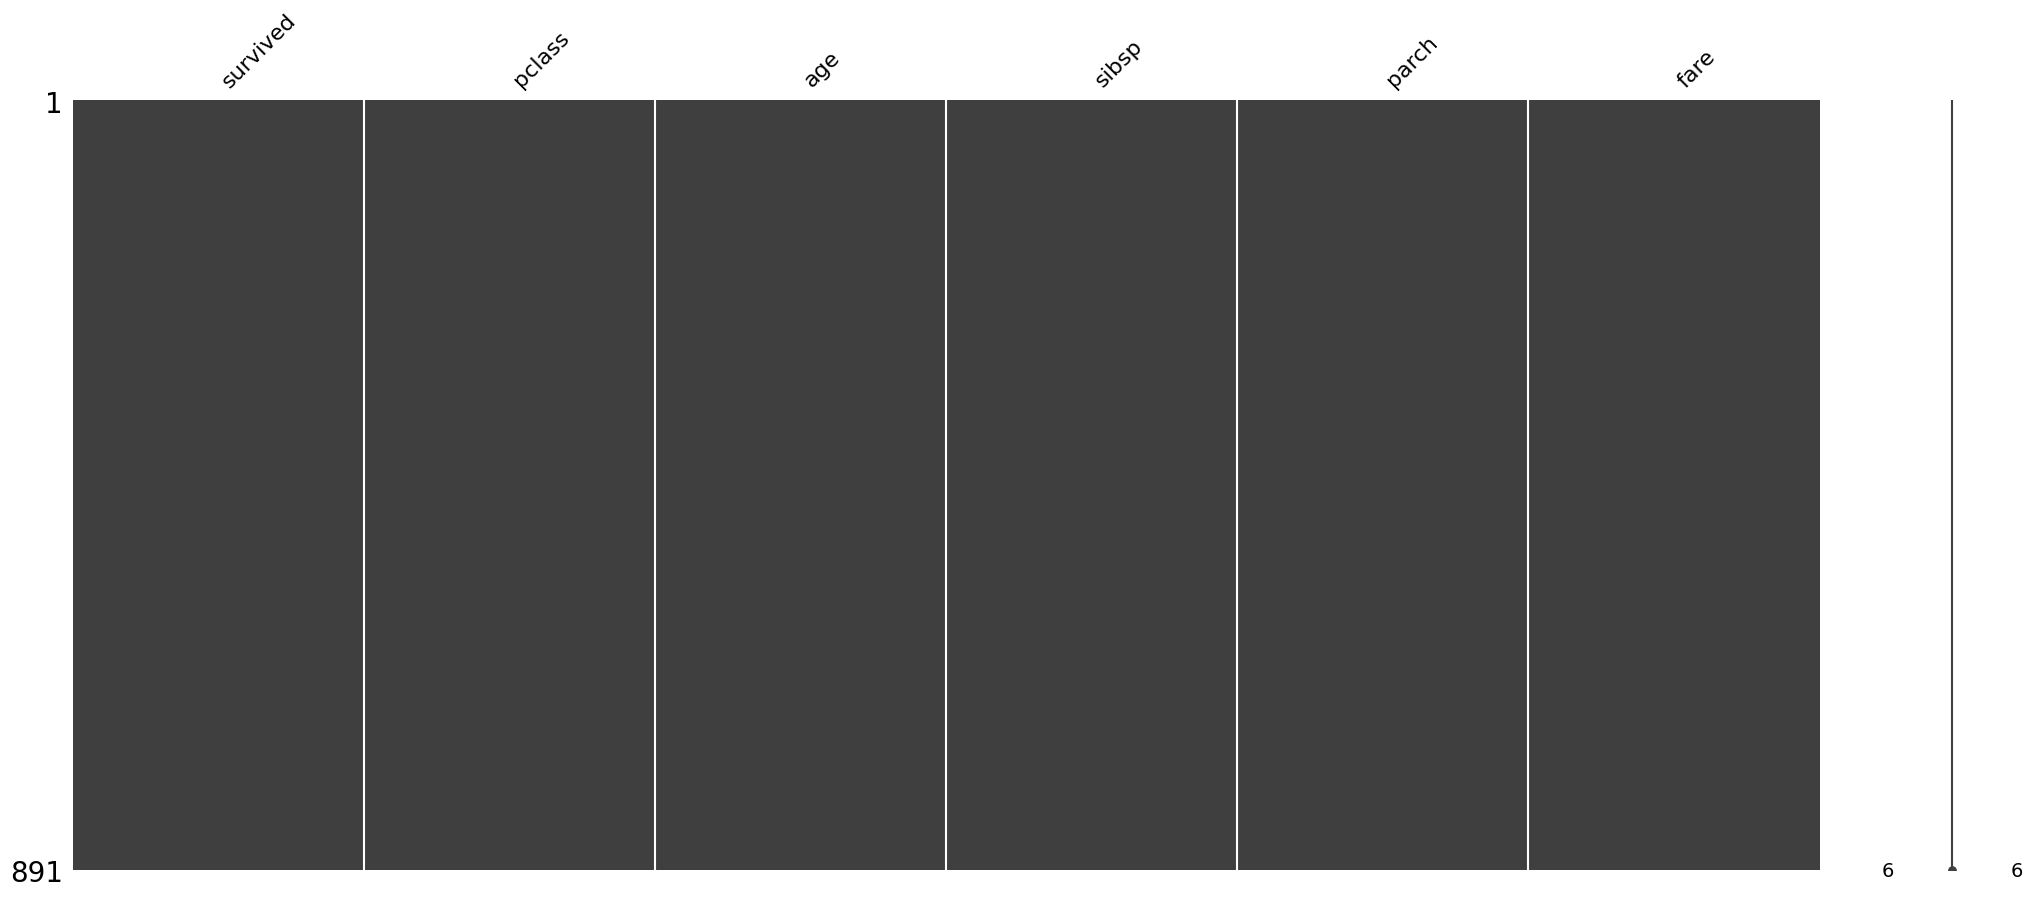

In [142]:
msno.matrix(dff);
# öncelikle yapısal problem var mı buna dikkkat edin makine öğrenmesi ile doldurmadan önce

### 15.3. EM: Expectation Maximizatio (EM) Algorithm

In [143]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
# 1. yapısal bi problem var mı? bakınız

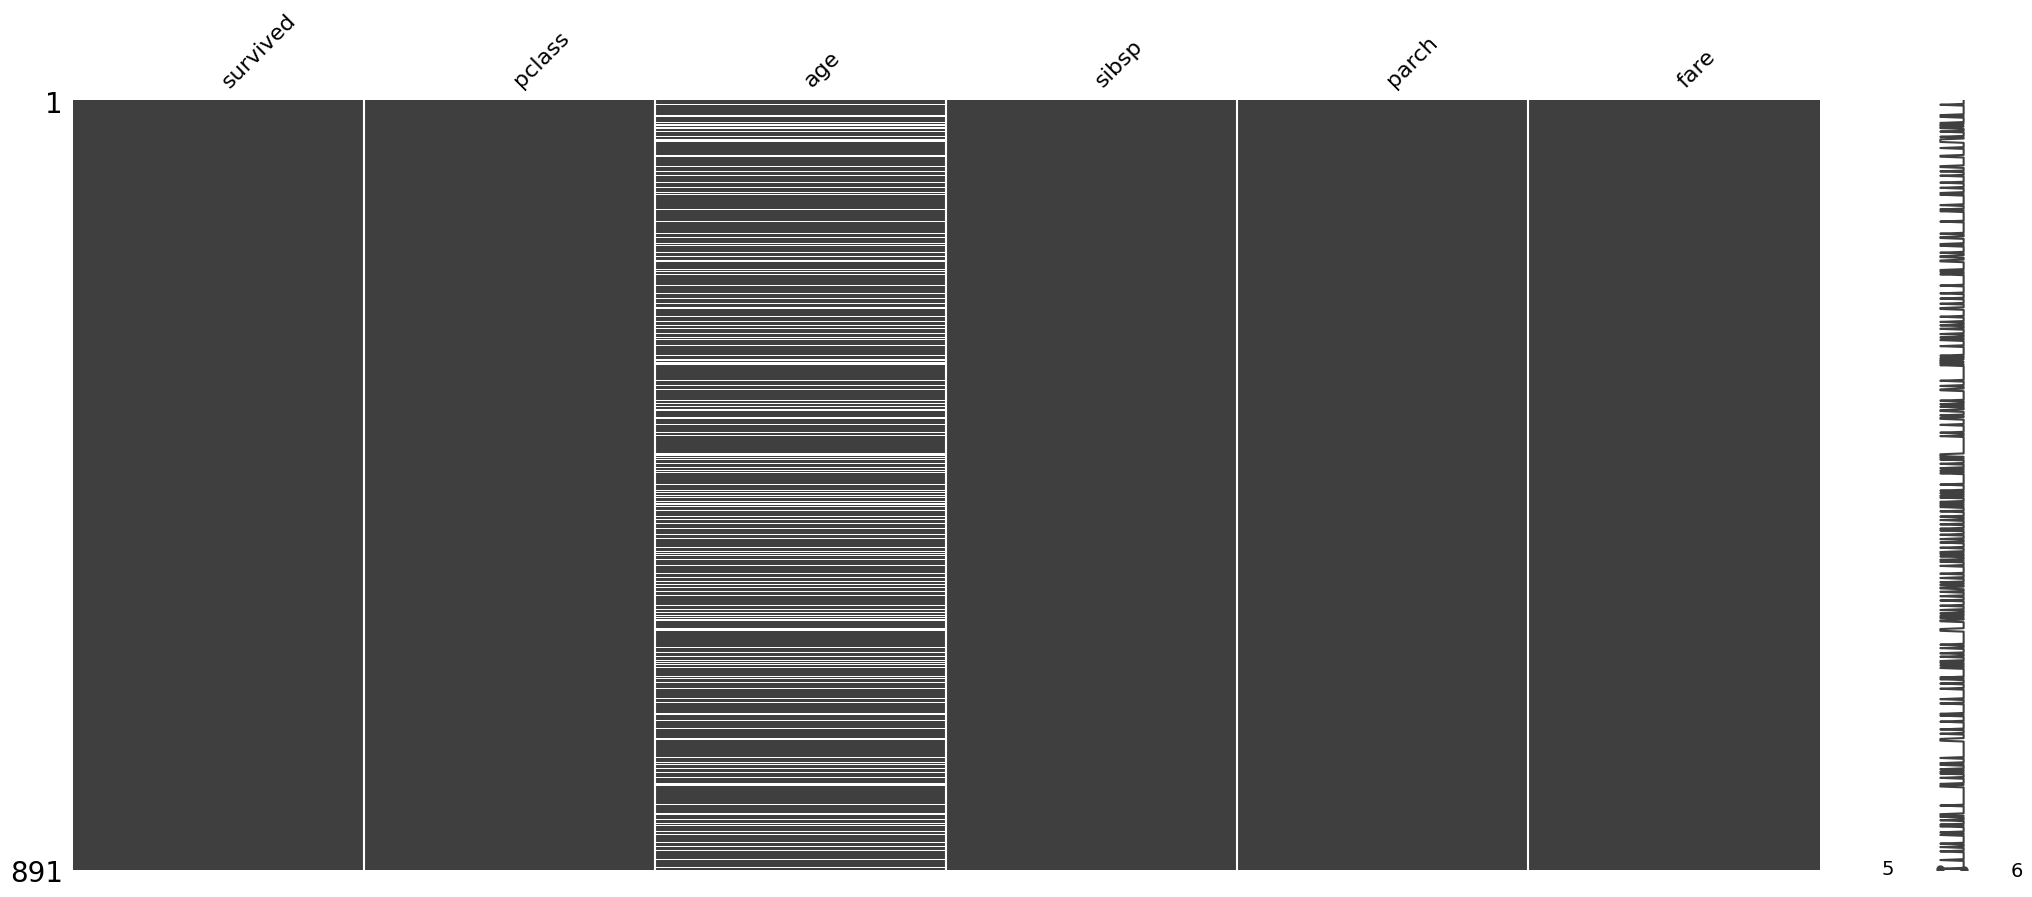

In [144]:
msno.matrix(df);

In [145]:
from ycimpute.imputer import EM

In [146]:
var_names = list(df)

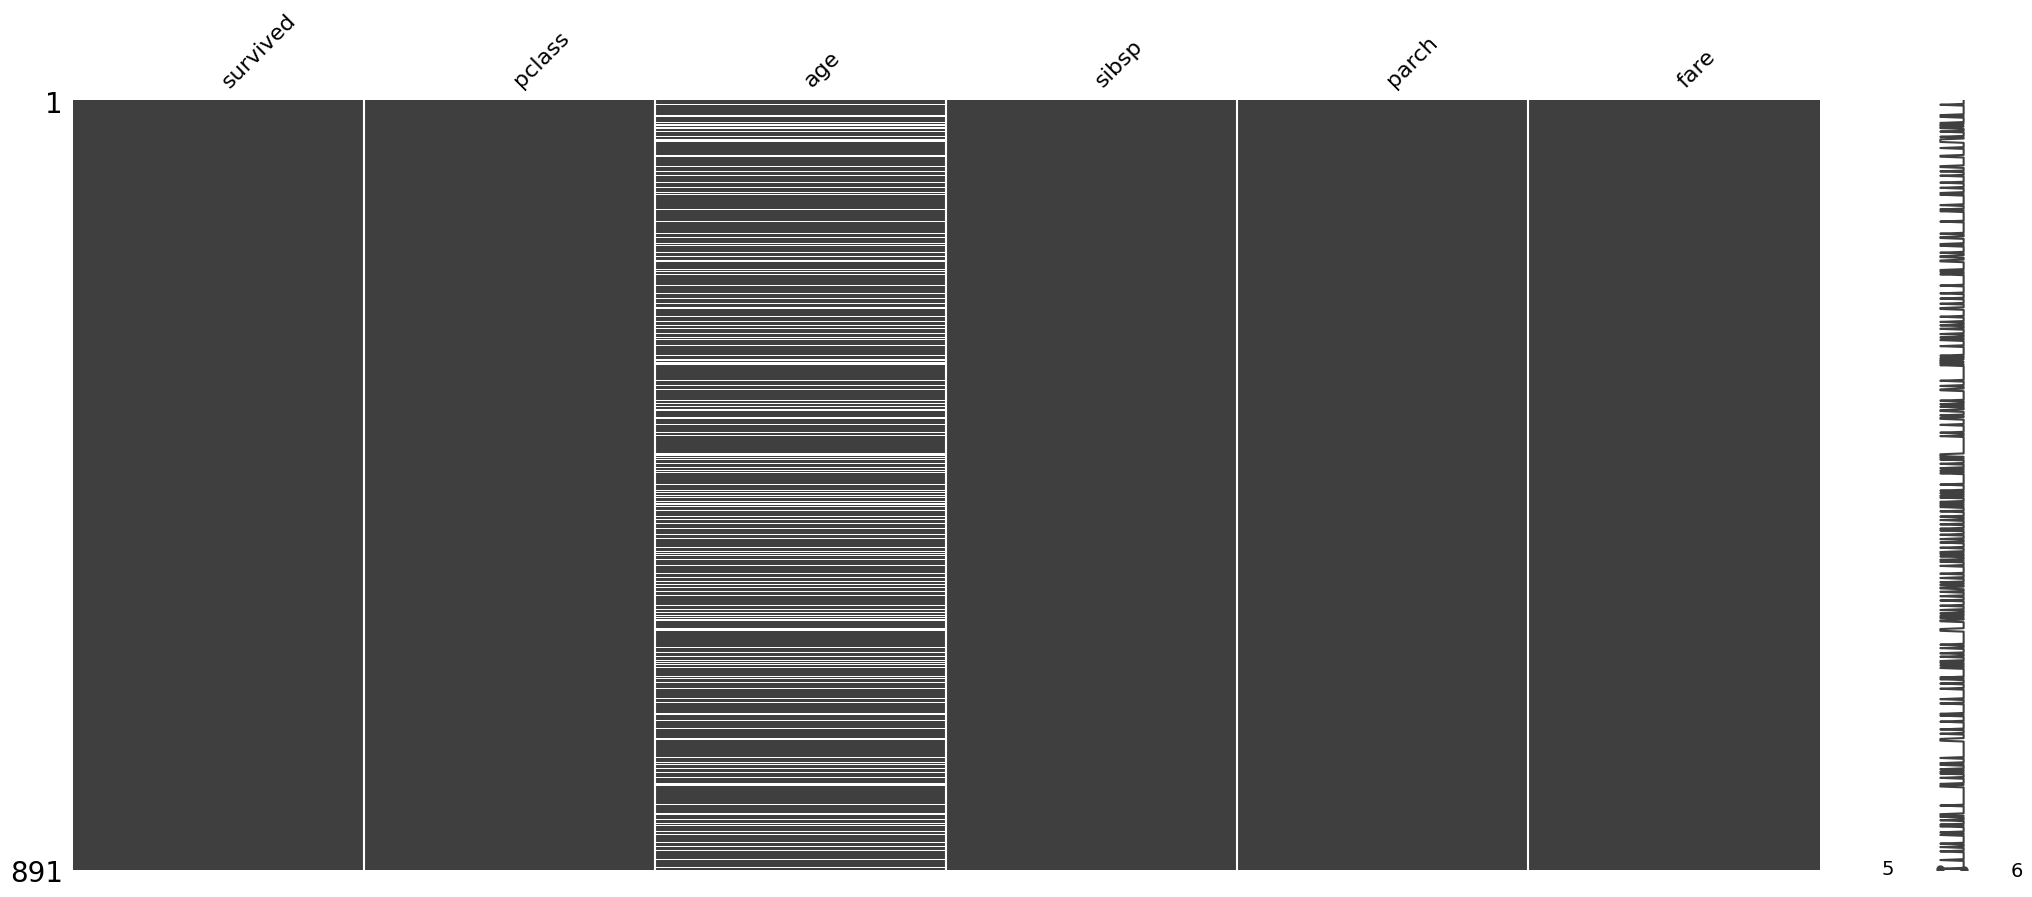

In [147]:
msno.matrix(df);

In [148]:
import numpy as np
n_df = np.array(df)

In [149]:
dff = EM().complete(n_df)

In [150]:
dff = pd.DataFrame(dff, columns = var_names)

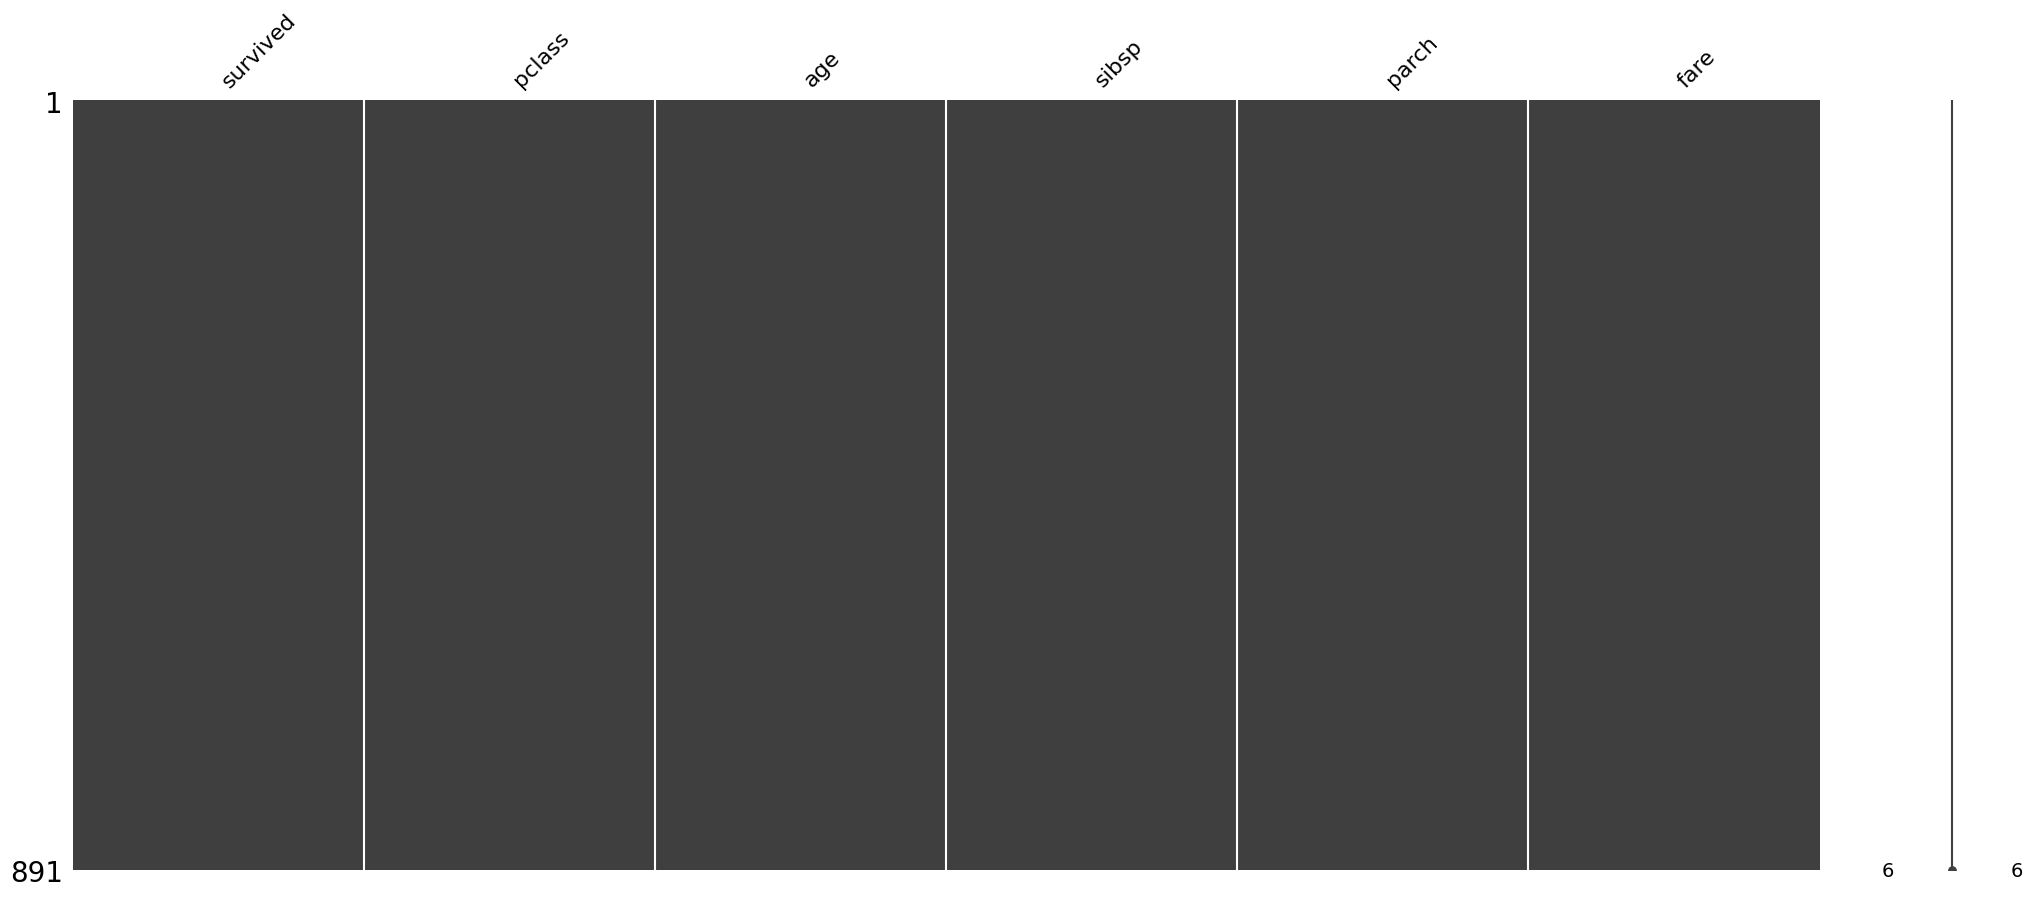

In [151]:
msno.matrix(dff);

In [152]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

# 16. Değişken Standardizasyonu (Veri Standardizasyonu)

In [153]:
# Değişken standardizasyonu: değişken varyansı ve sırası değişmez. değerler değişecektir. z skor, normalleştirme?
# dağılımı değişir, bilgiyi bozmadan değiştirir

# Değişken dönüşümü: değişkenin taşıdığı bilginin taşıdğı şekliyle kalamaması
# cinsyet kadın,erkek-> 0,1
# yaş, sıralı, -> kategoriğe dönüştürme
# yapısı değişir, veriyi bazen bozar bazen temsil şeklini değiştirir

import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

# Tiplerini ondalık hale getirme
df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


### 16.1 Standardizasyon

değerleri dönüştür.

copy argümanı True, inplace =False: orijinal yapısını bozmaz.

makine öğrenmesi, algoritmalar standart değişkenleri sever.

In [154]:
# normal dağılımı -3, +3 arası değerler
from sklearn import preprocessing 

In [155]:
# Değerleri dönüştür.
# copy argümanı True, inplace = False: orijinal yapısını bozmaz.
preprocessing.scale(df)
# Makine öğrenmesi, algoritmalar standart değişkenleri sever.

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [156]:
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [157]:
df.mean()

V1    4.4
V2    7.8
V3    8.6
dtype: float64

### 16.2 Normalizasyon
Değerleri 0,1 arasında atar ve dönüştürür

In [158]:
# değerleri 0,1 arasında dönüştürür
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

### 16.3 Min-Max Dönüşümü

değerleri iki aralığa atar çalıştırır.

dönüştürücü nesnesi oluşturduk.

In [159]:
# değerleri iki aralığa atar çalıştırır.
# dönüştürücü nesnesi oluşturduk.
# değişken aralığını belirttikten sonra fit_transform fonk kullanmak için nesne oluştur
scaler = preprocessing.MinMaxScaler(feature_range = (100,300))

In [160]:
# initiate etme, dönüştürücü nesnesi oluşturma
scaler.fit_transform(df)

array([[100.        , 157.14285714, 122.22222222],
       [166.66666667, 157.14285714, 255.55555556],
       [266.66666667, 100.        , 100.        ],
       [233.33333333, 185.71428571, 122.22222222],
       [300.        , 300.        , 300.        ]])

# 17.Değişken Dönüşümleri

In [161]:
# Değişken dönüşümleri > standardizasyon(verinin özütünü korur)
# !!! değişken dönüşümleri yaparken, mevcut verinin bilginin YAPISI bozuluyor mu?
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 17.1. 0-1 Dönüşümü

Kategorik veriyi numerik veriye dönüştürmek

Cinsiyet değişkeni 0-1 çevirmek,

LabelEnconder, fit_transform hangi değere hangi sayı geliyorsa bunu bilmek gerekiyor. Hangisiyle ilgileniyorsak ona 1 deriz. 

In [162]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()

In [163]:
# hangi değişkeni istemek
lbe.fit_transform(df["sex"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [164]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [165]:
lbe.fit_transform(df["time"])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [166]:
df.dropna(how = "all")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [167]:
#Yeni değişkene cinsiyet atama
df["yeni_sex"] = lbe.fit_transform(df["sex"])

In [168]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [169]:
#Yeni değişkene cinsiyet atama
df["yeni_time"] = lbe.fit_transform(df["time"])

In [170]:
df
# not: hangisi 0 hangisi 1 bunu bilmek gerekiyor?

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_time
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0


### "1 ve Diğerleri (0) " Dönüşümü

In [171]:
#bağımlı değişkenleri bilmek gerekiyor.
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_time
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0


In [172]:
# true false vektörü döndü
df["day"].str.contains("Sun")

0       True
1       True
2       True
3       True
4       True
       ...  
239    False
240    False
241    False
242    False
243    False
Name: day, Length: 244, dtype: bool

In [173]:
# day içine bak, içinde SUN ifadesi varsa 1 denmesini, diğerlerine 0 denmesini istiyoruz.
import numpy as np 
df["yeni_day"] = np.where(df["day"].str.contains("Sun"), 1, 0)

In [174]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_time,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0,0


In [175]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [176]:
lbe.fit_transform(df["day"])
#sınıf sayısı kadar, sayı oluşur 0dan başlar
# 0 dan 3 arasında bir sınıf olacaktır. 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [177]:
# Çok dikkat 


# 18. One-Hot Dönüşümü ve Dummy Değişken Tuzağı


Çok dikkat 

Elimizdeki kategorik bir değişkenin ikiden fazla sınıfı varsa, algoritme bunun 0-3 arası olarak algıyacak. Kategorik değişkenin sınıflarının bağımlı değişkene olan etkileri bozulacaktır. Kategorik nominal iken, bozulup sanki aralarında bir fark varmış gibi oluyor.

Halbuki bu nominal ile ölçülmüş.

Bunun önüne geçmek için One-hot enconding yapmak gerekiyor.


In [178]:
#one hot enconding
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_time,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,1


prefix ön isimlendirmesi nedir?
 sınıf sayısı kadar değişken oluştu.
 
 tuzak: bir değişken üzerinden başka bir değişken oluşturalabiliyorsa
 
 tuzak: kadın üzerinden erkek, erkek üzerinden kadın oluşturabliyor.
 
Çözüm: iki değişkenden biri yok edilmeli, iki kategorik değerlerde

df_one_hot = pd.get_dummies(df, columns = ["sex"], prefix = ["sex"])

In [179]:
# prefix ön isimlendirmesi nedir?
# sınıf sayısı kadar değişken oluştu.
# tuzak: bir değişken üzerinden başka bir değişken oluşturalabiliyorsa
# tuzak: kadın üzerinden erkek, erkek üzerinden kadın oluşturabliyor.
# Çözüm: iki değişkenden biri yok edilmeli, iki kategorik değerlerde
df_one_hot = pd.get_dummies(df, columns = ["sex"], prefix = ["sex"])

In [180]:
df_one_hot.head()
# iki sınıflı kadar yeni değişken oluştu.
# yeni_sex verisine kıyasla iki veriden oluşan sex_Male ve sex_Female verisinden oluştu

,total_bill,tip,smoker,day,time,size,yeni_sex,yeni_time,yeni_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,0,1,False,True
1,10.34,1.66,No,Sun,Dinner,3,1,0,1,True,False
2,21.01,3.50,No,Sun,Dinner,3,1,0,1,True,False
3,23.68,3.31,No,Sun,Dinner,2,1,0,1,True,False
4,24.59,3.61,No,Sun,Dinner,4,0,0,1,False,True


Bir değişken üzerinden başka bir değişken oluşturalabiliyorsa buna dummy değişken tuzağı denir. 
sex_Male ve sex_Female hatta orjinal veri aynı şeyi ifade eder.

In [181]:
# değişkenin orijinal hali veride olmamalı
pd.get_dummies(df, columns = ["day"], prefix = ["day"]).head()

,total_bill,tip,sex,smoker,time,size,yeni_sex,yeni_time,yeni_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,0,1,False,False,False,True
1,10.34,1.66,Male,No,Dinner,3,1,0,1,False,False,False,True
2,21.01,3.50,Male,No,Dinner,3,1,0,1,False,False,False,True
3,23.68,3.31,Male,No,Dinner,2,1,0,1,False,False,False,True
4,24.59,3.61,Female,No,Dinner,4,0,0,1,False,False,False,True


In [182]:
df_one_hot = pd.get_dummies(df, columns = ["time"], prefix = ["time"])
df_one_hot 

,total_bill,tip,sex,smoker,day,size,yeni_sex,yeni_time,yeni_day,time_Lunch,time_Dinner
0,16.99,1.01,Female,No,Sun,2,0,0,1,False,True
1,10.34,1.66,Male,No,Sun,3,1,0,1,False,True
2,21.01,3.50,Male,No,Sun,3,1,0,1,False,True
3,23.68,3.31,Male,No,Sun,2,1,0,1,False,True
4,24.59,3.61,Female,No,Sun,4,0,0,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,3,1,0,0,False,True
240,27.18,2.00,Female,Yes,Sat,2,0,0,0,False,True
241,22.67,2.00,Male,Yes,Sat,2,1,0,0,False,True
242,17.82,1.75,Male,No,Sat,2,1,0,0,False,True


### Veri Standardizasyonu - Dönüşümü

In [183]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

# Tiplerini ondalık hale getirme
df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


Ana veri seti etkilenmeden çalıştıralım

In [184]:
# Standartlaştırma
from sklearn import preprocessing 
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [185]:
# Normalizasyon
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [187]:
# Min- Max Dönüşümü
scaler = preprocessing.MinMaxScaler(feature_range = (10,20))
scaler

MinMaxScaler(feature_range=(10, 20))

In [189]:
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

### Binarize Dönüşüm

In [190]:
binarizer = preprocessing.Binarizer(threshold = 5).fit(df)

In [191]:
binarizer.transform(df) # orjinal set yerine geçici çalışır
# belirli bir eşik değerine göre 0-1 dönüşümü

array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 0., 0.],
       [0., 1., 1.],
       [1., 1., 1.]])

### 0-1 Dönüşümü

In [192]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df_l = df.copy()

In [193]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [194]:
df_l["yeni_sex"] = df_l["sex"].cat.codes

In [195]:
df_l.head

<bound method NDFrame.head of      total_bill   tip     sex smoker   day    time  size  yeni_sex
0         16.99  1.01  Female     No   Sun  Dinner     2         1
1         10.34  1.66    Male     No   Sun  Dinner     3         0
2         21.01  3.50    Male     No   Sun  Dinner     3         0
3         23.68  3.31    Male     No   Sun  Dinner     2         0
4         24.59  3.61  Female     No   Sun  Dinner     4         1
..          ...   ...     ...    ...   ...     ...   ...       ...
239       29.03  5.92    Male     No   Sat  Dinner     3         0
240       27.18  2.00  Female    Yes   Sat  Dinner     2         1
241       22.67  2.00    Male    Yes   Sat  Dinner     2         0
242       17.82  1.75    Male     No   Sat  Dinner     2         0
243       18.78  3.00  Female     No  Thur  Dinner     2         1

[244 rows x 8 columns]>

In [196]:
lbe = preprocessing.LabelEncoder()

In [197]:
df_l["daha_yeni_sex"] = lbe.fit_transform(df_l["sex"])

In [198]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


### "1 ve Diğerleri (0)" Dönüşümü

In [199]:
# Kategorik değişkende 2 den fazla sınıfta bir sınıfa odaklanıp 
# hedef değişkene göre bağımlı değişkene göre (sürekli veya kategorik)
# bir sınıf diğerlerine göre daha ayırt ediciliğe sahipse kullanılır
# Diğer sınıflar indirgenir
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


In [200]:
df_l["yen_gun"] = np.where(df_l["day"].str.contains("Sun"), 1, 0)

In [201]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex,yen_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1


In [202]:
df_l.tail()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex,yen_gun
239,29.03,5.92,Male,No,Sat,Dinner,3,0,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,0,1,0
243,18.78,3.00,Female,No,Thur,Dinner,2,1,0,0


### Çok Sınıflı Dönüşüm

In [203]:
lbe = preprocessing.LabelEncoder()

In [205]:
df_l["daha_yeni_gun"] = lbe.fit_transform(df_l["day"])

In [206]:
df_l

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex,yen_gun,daha_yeni_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,1,0,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,0,0,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,1,0,1
242,17.82,1.75,Male,No,Sat,Dinner,2,0,1,0,1


Algoritmaların kafası karıştığı için kategorik değişkenin bağımlı değişkene olan etkileri bozulmaktadır. Dummy değişken tuzağından kurtulmak için:

(Kategorik değişkenin sınıf sayısı - 1 adet) dummy değişken oluşturulmalıdır.

*Elimizde ordinal veri olsaydı(rütbeli sınıflar), kategorik değişkeni sürekli değişkene çevirerek kullanabiliriz. Sınıfar arasındaki fark korunmuş olacaktır.*

### One-Hot Dönüşümü ve Dummy Değişken Tuzağı

In [207]:
df_one_hot = df.copy()

In [208]:
pd.get_dummies(df_one_hot, columns = ["sex"], prefix = ["sex"]).head()

,total_bill,tip,smoker,day,time,size,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,False,True
1,10.34,1.66,No,Sun,Dinner,3,True,False
2,21.01,3.50,No,Sun,Dinner,3,True,False
3,23.68,3.31,No,Sun,Dinner,2,True,False
4,24.59,3.61,No,Sun,Dinner,4,False,True


In [209]:
pd.get_dummies(df_one_hot, columns = ["day"], prefix = ["day"]).head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,False,False,False,True
1,10.34,1.66,Male,No,Dinner,3,False,False,False,True
2,21.01,3.50,Male,No,Dinner,3,False,False,False,True
3,23.68,3.31,Male,No,Dinner,2,False,False,False,True
4,24.59,3.61,Female,No,Dinner,4,False,False,False,True


### Sürekli Değişkeni Kategorik Değişkene Çevirme

In [210]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [211]:
dff = df.select_dtypes(include = ["float64", "int64"])

In [212]:
est = preprocessing.KBinsDiscretizer(n_bins = [3,2,2], encode = "ordinal", strategy = "quantile").fit(dff)

In [213]:
est.transform(dff)[0:10]

array([[1., 0., 1.],
       [0., 0., 1.],
       [1., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.]])

### Değişkeni İndexe, İndexi Değişkene Çevirmek

In [214]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [215]:
df["yeni_degisken"] = df.index

In [216]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_degisken
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,2
3,23.68,3.31,Male,No,Sun,Dinner,2,3
4,24.59,3.61,Female,No,Sun,Dinner,4,4


In [217]:
df["yeni_degisken"] = df["yeni_degisken"] + 10

In [218]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_degisken
0,16.99,1.01,Female,No,Sun,Dinner,2,10
1,10.34,1.66,Male,No,Sun,Dinner,3,11
2,21.01,3.50,Male,No,Sun,Dinner,3,12
3,23.68,3.31,Male,No,Sun,Dinner,2,13
4,24.59,3.61,Female,No,Sun,Dinner,4,14


In [219]:
df.index = df["yeni_degisken"]

In [220]:
df.index

Index([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
       ...
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253],
      dtype='int64', name='yeni_degisken', length=244)

In [221]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_degisken
yeni_degisken,,,,,,,,
10,16.99,1.01,Female,No,Sun,Dinner,2,10
11,10.34,1.66,Male,No,Sun,Dinner,3,11
12,21.01,3.50,Male,No,Sun,Dinner,3,12
13,23.68,3.31,Male,No,Sun,Dinner,2,13
14,24.59,3.61,Female,No,Sun,Dinner,4,14
...,...,...,...,...,...,...,...,...
249,29.03,5.92,Male,No,Sat,Dinner,3,249
250,27.18,2.00,Female,Yes,Sat,Dinner,2,250
251,22.67,2.00,Male,Yes,Sat,Dinner,2,251


# 19. Bölüm Sonu Değerlendirmesi

Veri Ön İşleme 

Aykırı Gözlem Analizi

Eksik Gözlem Analizi

Değişken Standartlaştırma

Değişken Dönüştürme

## **SORULAR**
**Soru 1:
Pandas Kütüphanesi içerisinde verilerin saklandığı nesnenin ismi nedir?**
* DataFrame

**Soru 2:
Python ile verileri yüklemek için aşağıdaki hangi kod kullanılabilir?**
* veriler = pd.read_csv('veriler')

**Soru 3:
Ordinal veriler için (örneğin bir gömlek bedeni S, M, L veya XL olması gibi bir durum için), aşağıdaki encoding yöntemlerinden hangisini kullanmak en doğrusudur?**
* LabelEncoder

**Soru 4:
Verileri eğitim ve test kümesi olarak bölerken aşağıdakilerden hangisi en kötü seçimi oluşturur?**
* 1/2 : 1/2

**Soru 5:
Bütün makine öğrenmesi algoritmaları bütün veri tipleri ile çalışabilir.**
* Yanlış